Note that the variables in the houshold problem e, a, are in terms of non-tradable goods. We can convert them to tradable goods by multiplying them by the price of the non-tradable good. Consumption outputs c are in real terms.

In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations

run_test = False
path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIG/fig/0403/'
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']




In [2]:
model = IHANKModelClass(name='baseline')
model.par.nu = 2.0
model.par.eta_s = 0.5 
model.par.etaF = 0.5
model.par.etaE = 0.1
model.par.gamma_ = model.par.epsilon_
# model.par.epsilon_ = 0.0 # for homothetic preferences
model.par.float = True
model.par.pf_fixed = False
model.par.mon_policy = 'real'
model.par.phi_inflation = 1.0

model.find_ss(do_print=False)
model.compute_jacs()

shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model) 

Share of domestic workers in tradable sector = 0.50


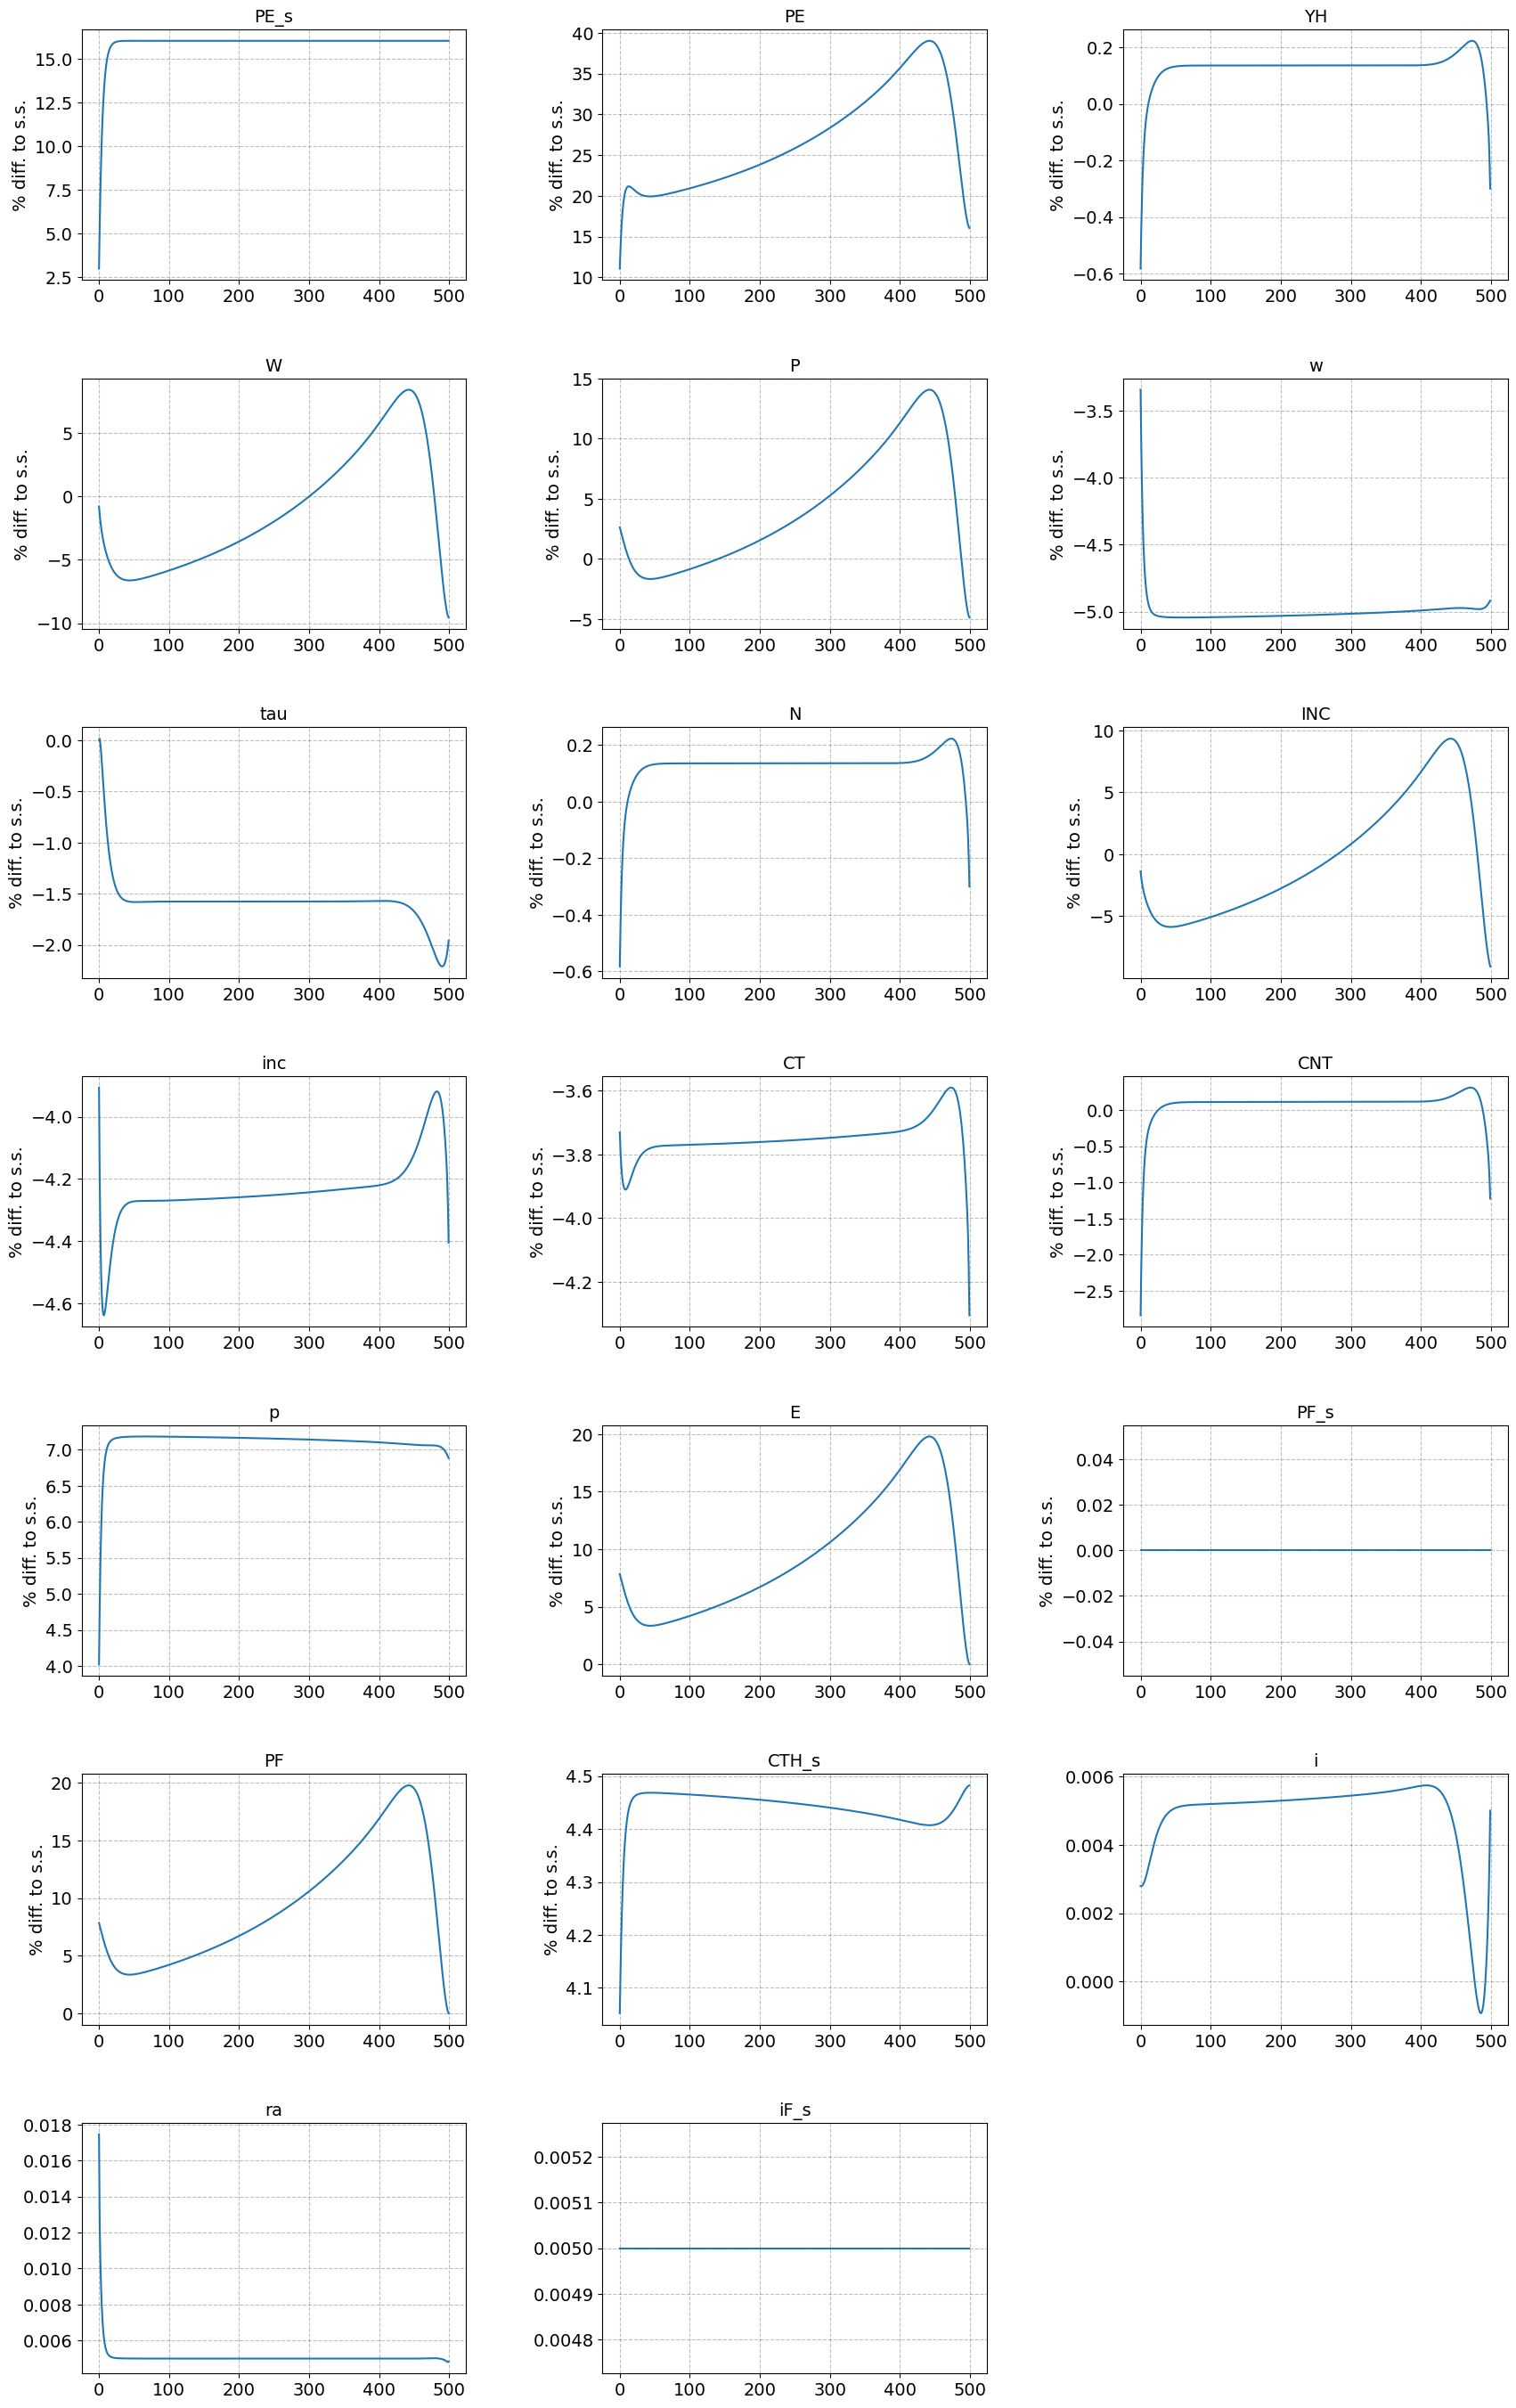

In [3]:

model_float = model.copy(name='Floating exchange rate')

model_float.find_transition_path(shocks=shock_PE_s, do_end_check=False)

model_float.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [4]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure

if run_test:
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)

    plt.figure()
    plt.plot(e_,share_)
    plt.xlabel('Total expenditure')
    plt.ylabel('Expenditure share tradable goods')
    plt.title('Non-homothetic expenditure shares')
    # model.test_hh_path()
    # model.test_path()
    # model.test_jacs()




In [5]:
model_fixed = model.copy(name='Fixed exchange rate')
# model_fixed.par.nu = 2.0
model_fixed.par.float = False
model_fixed.find_ss(do_print=False)
model_fixed.compute_jacs()
model_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)
# model_fixed.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

Share of domestic workers in tradable sector = 0.50


Share of domestic workers in tradable sector = 0.50


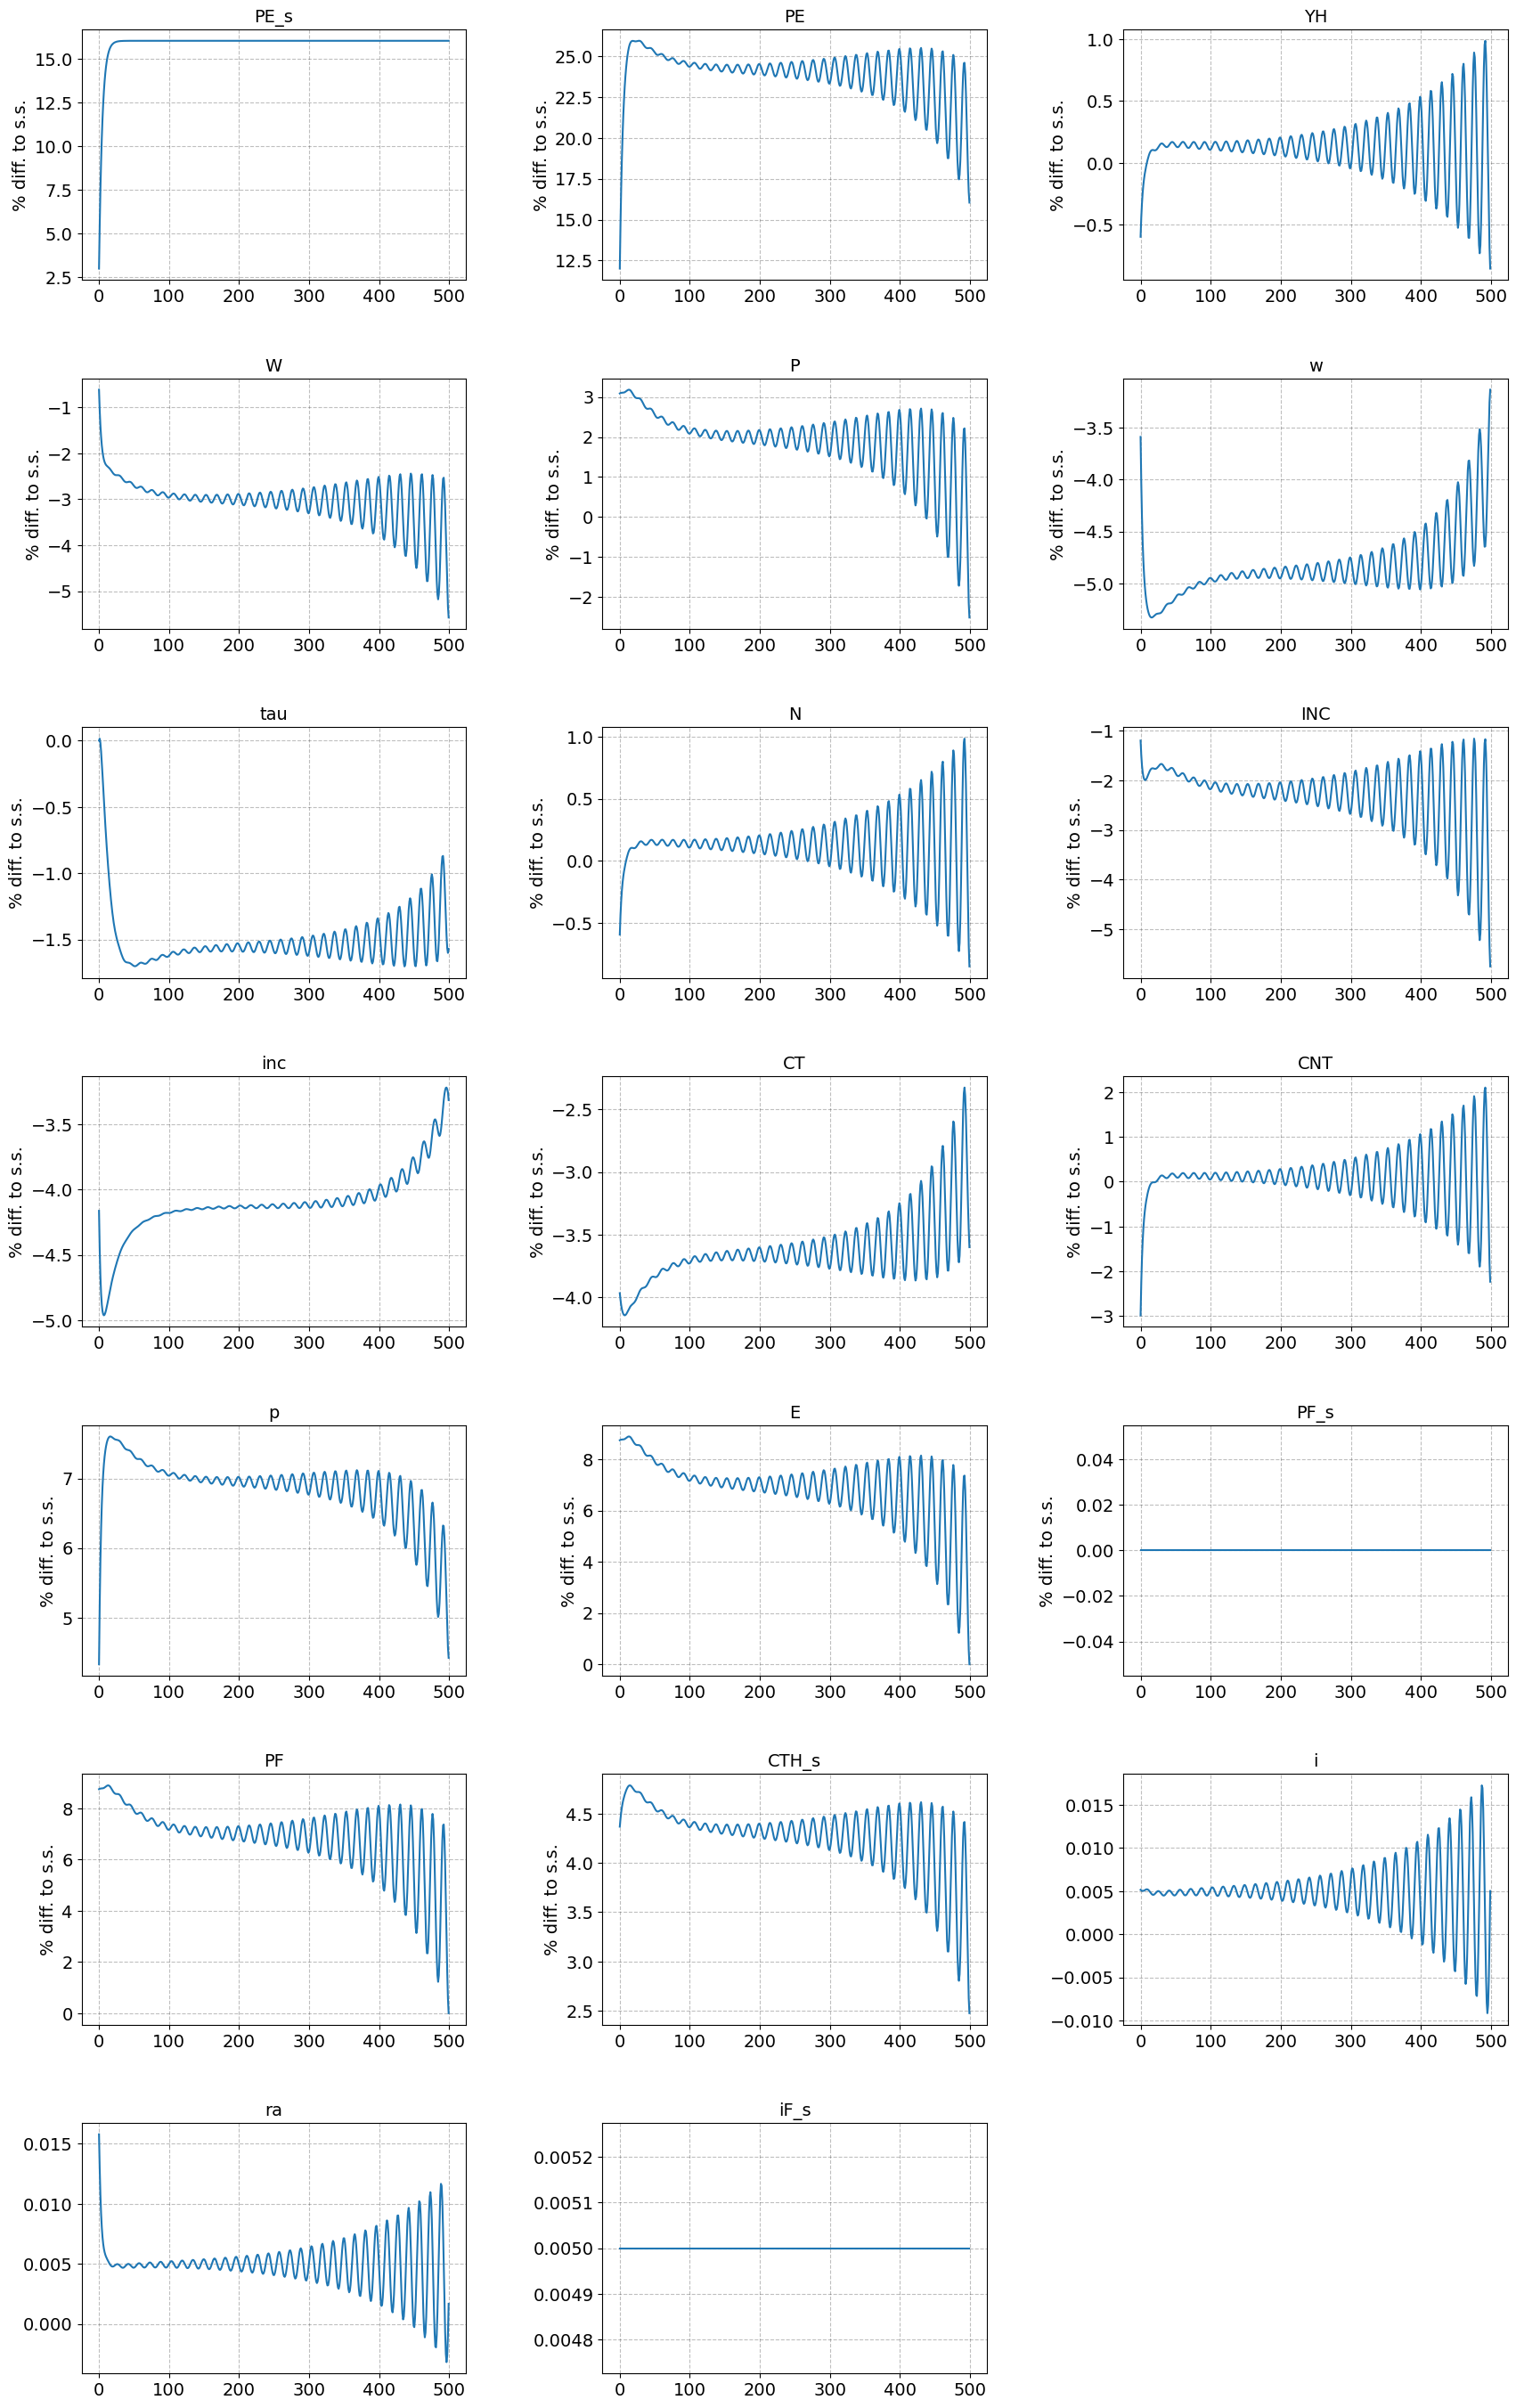

In [6]:
model_taylor = model.copy(name='Taylor rule')
# model_taylor.par.nu = 2.0
model_taylor.par.float = True
model_taylor.par.mon_policy = 'taylor_OLD'
model_taylor.find_ss(do_print=False)
model_taylor.compute_jacs()
model_taylor.find_transition_path(shocks=shock_PE_s, do_end_check=False)
model_taylor.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [7]:
models_list = [model_float, model_fixed, model_taylor]
labels = []
for i in models_list:
    labels.append(i.name)
print(labels)

['Floating exchange rate', 'Fixed exchange rate', 'Taylor rule']


### shocks ###


/Users/emmagundersen/GEModelTools/GEModelTools/figures.py:107: RuntimeWarning: invalid value encountered in divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)


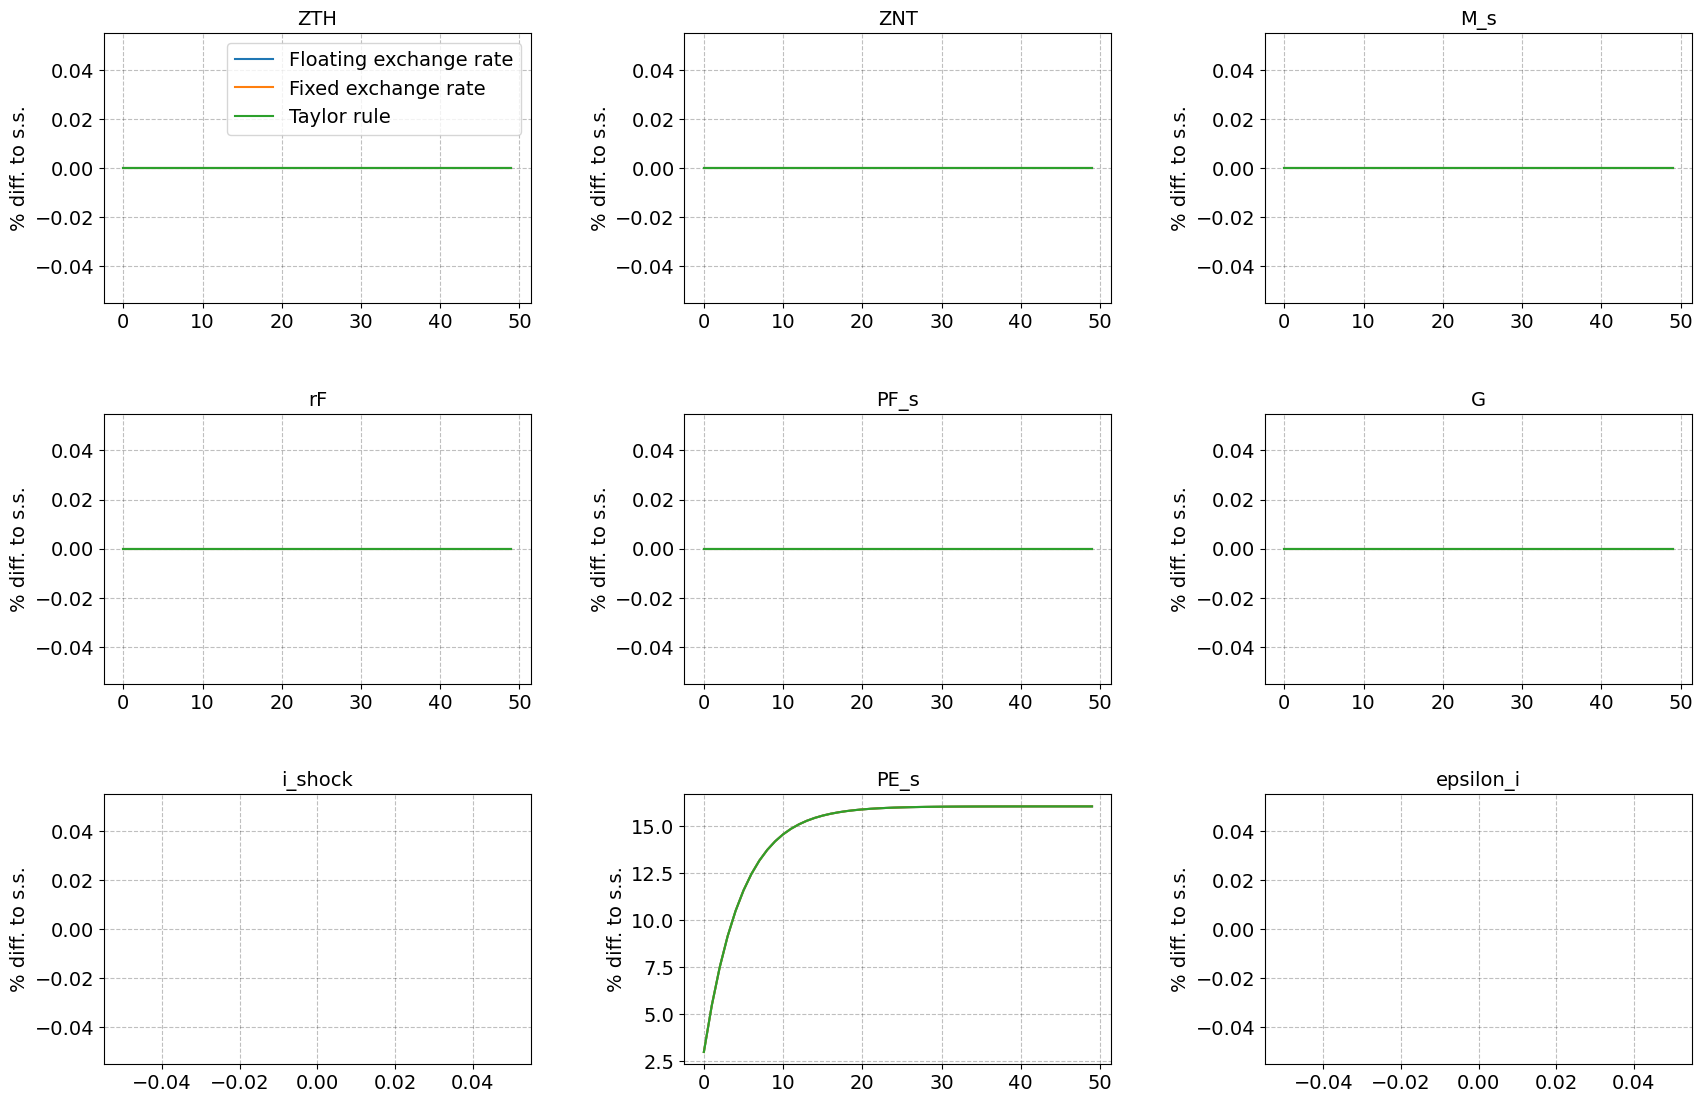


### varnames ###


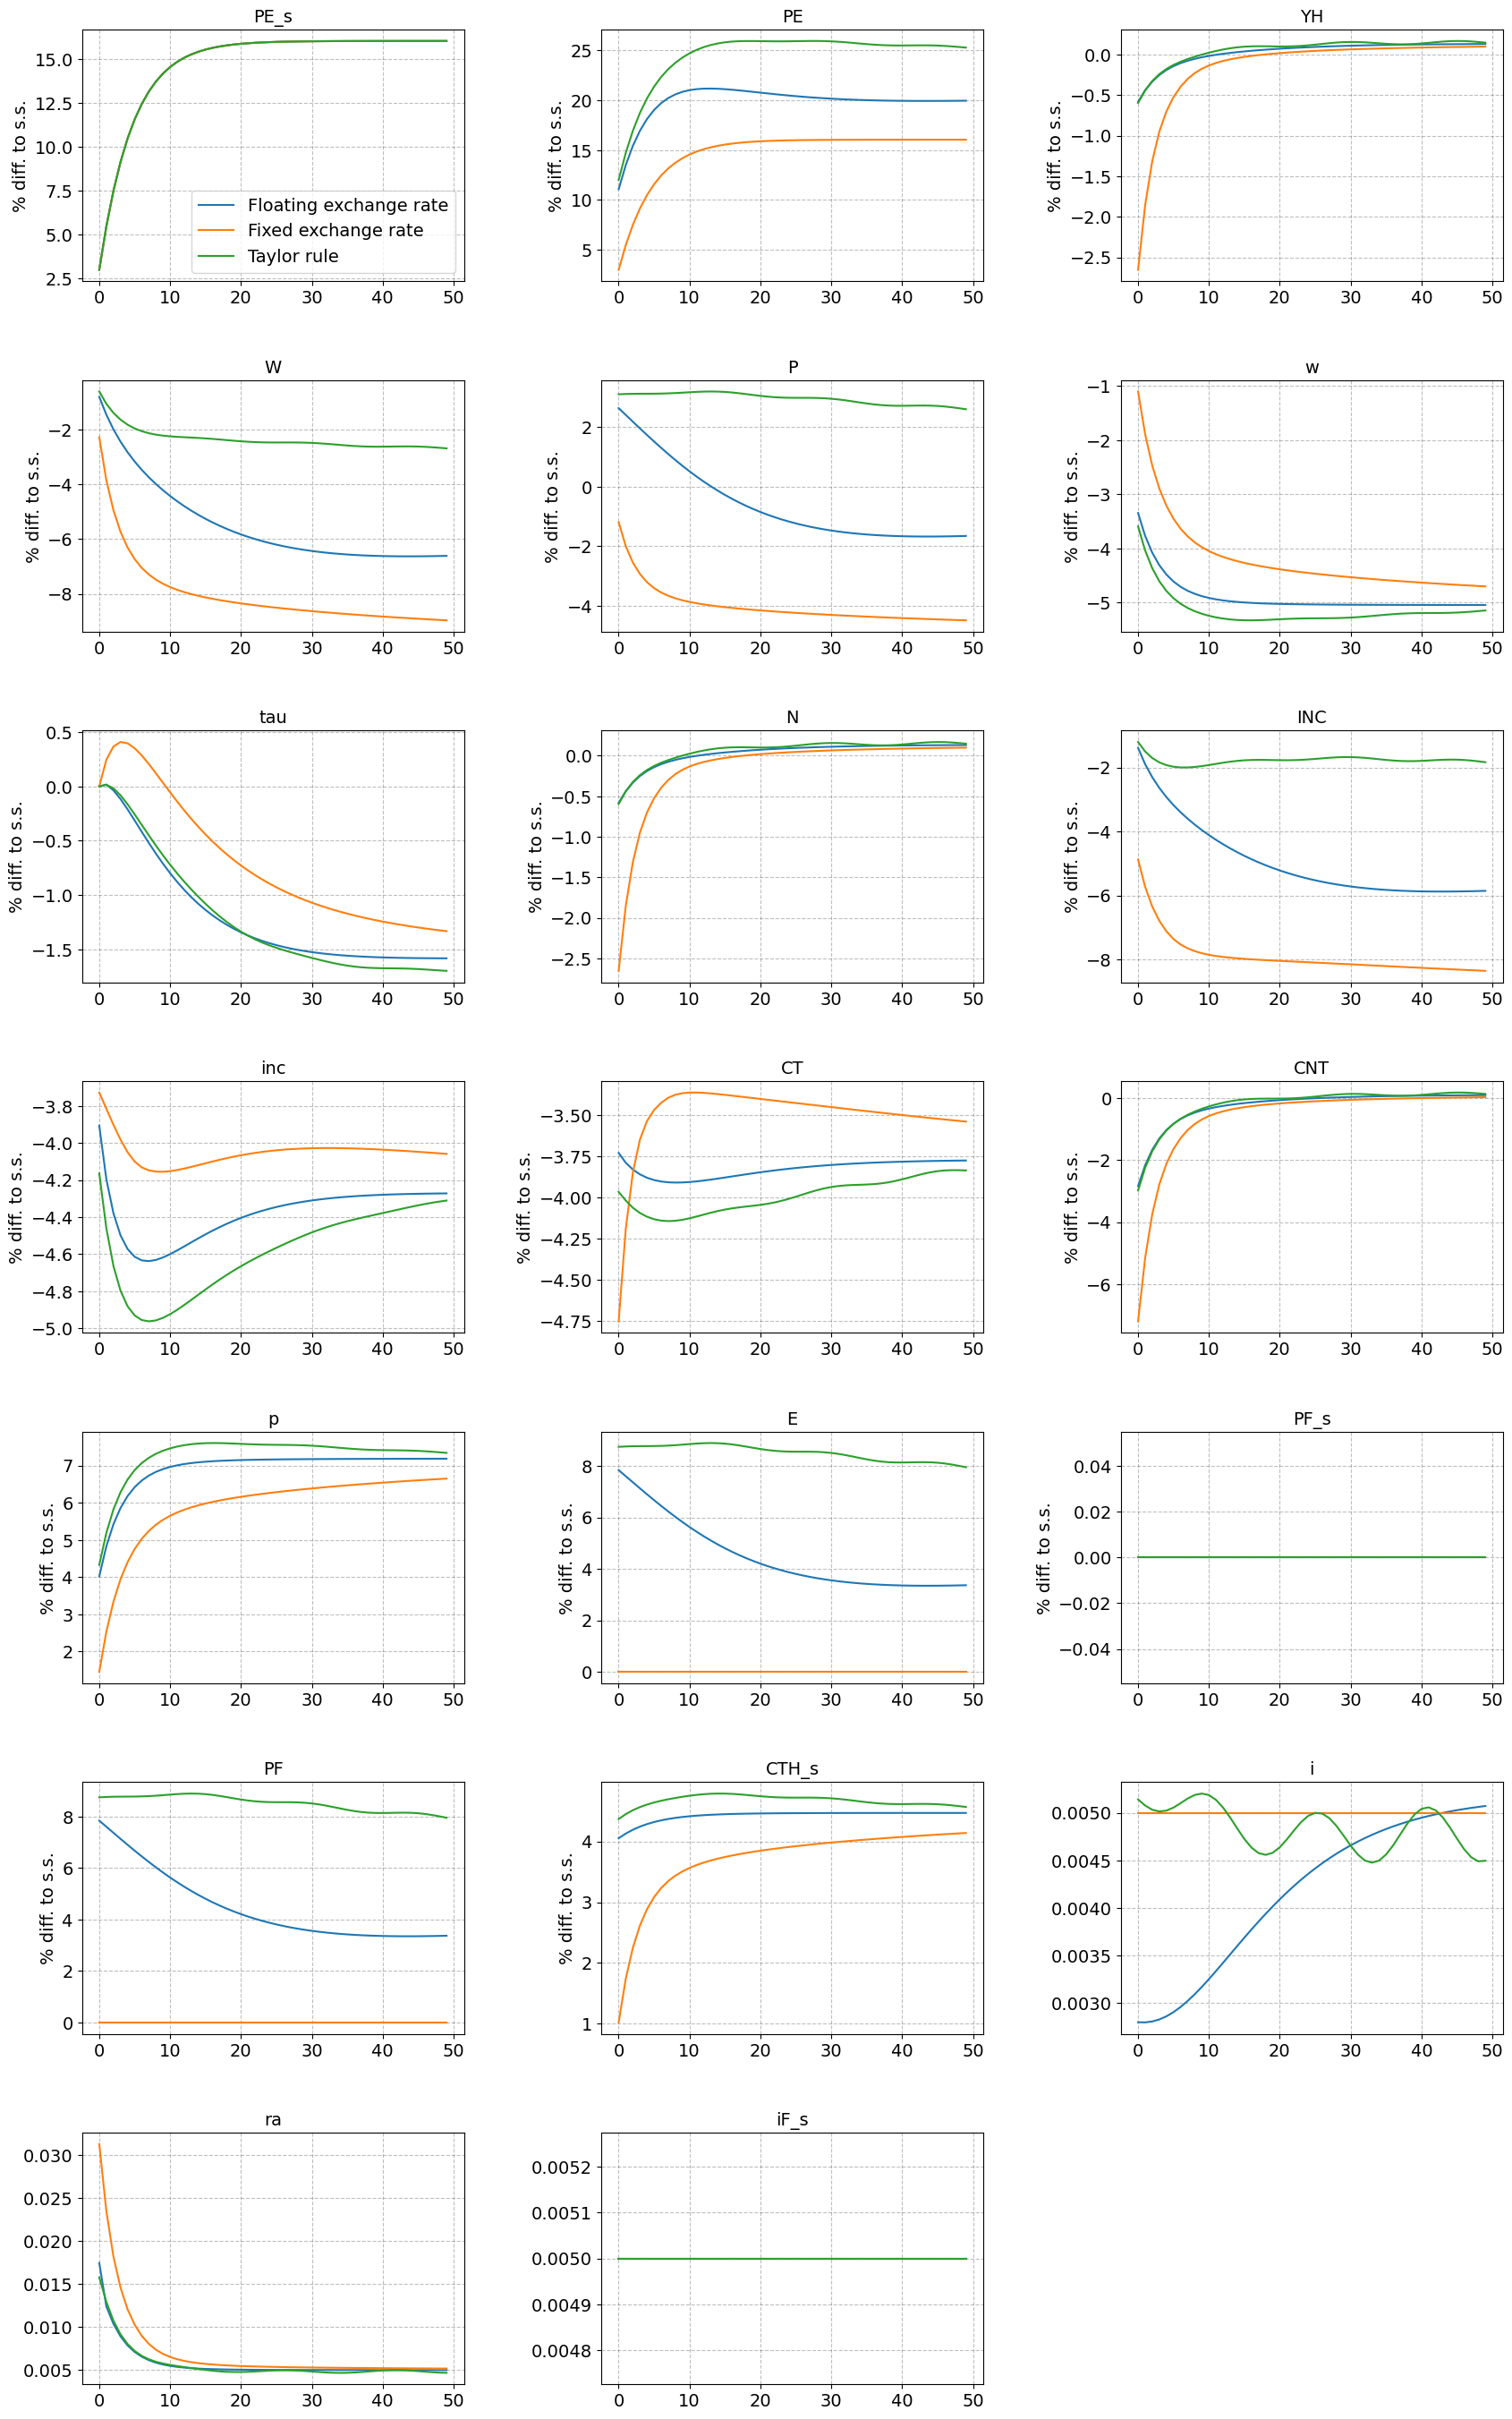

In [8]:
model_float.compare_IRFs(models=models_list, labels=labels, varnames=paths,  T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)


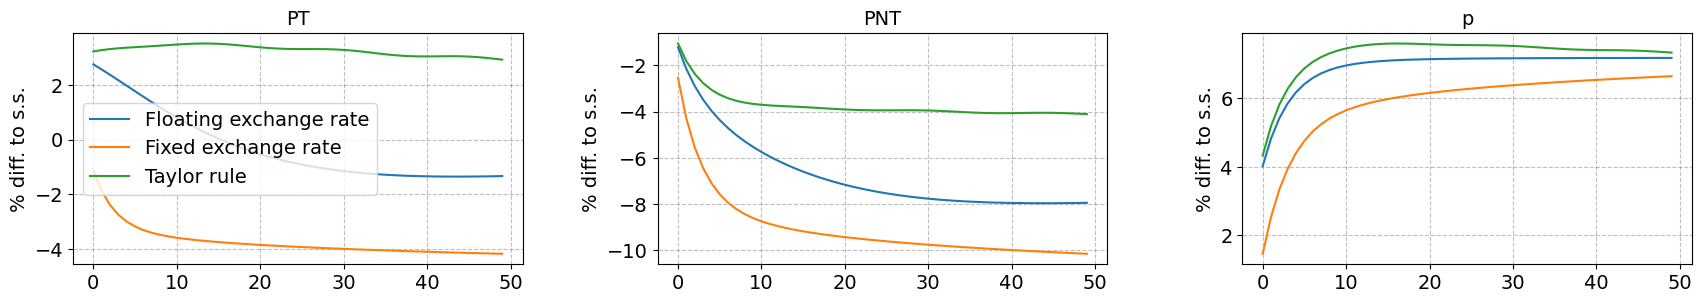

In [9]:
model_float.compare_IRFs(models_list, labels, ['PT', 'PNT', 'p'], T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)